In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from matplotlib import pyplot


features_for_mood = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

# load data

In [2]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [4]:
df['label'].value_counts()

sad           100
chillhop      100
tired         100
work          100
missed        100
discourage    100
cry           100
chillout       80
sea            80
lovesong       60
Name: label, dtype: int64

#**work,sad,sea 50%-77%**#



In [5]:
df = df[df.label != 'tired']
df = df[df.label != 'discourage']
df = df[df.label != 'cry']
df = df[df.label != 'chillhop']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']

 scaled data

In [6]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [7]:
X=scaler.transform(df[features_for_mood ])

 Data Splitting

In [8]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [9]:
X_train.shape

(196, 10)

In [10]:
X_test.shape

(84, 10)

In [11]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
467,0.638,0.193,9,-12.366,1,0.0357,0.000000,0.3160,0.550,140.118
483,0.822,0.678,0,-3.494,1,0.0341,0.000003,0.0975,0.535,83.497
519,0.505,0.596,4,-7.027,1,0.0410,0.000000,0.2610,0.335,167.517
76,0.672,0.557,11,-7.973,1,0.0376,0.000000,0.2000,0.550,129.970
534,0.832,0.632,1,-6.982,1,0.0423,0.000000,0.1090,0.830,102.992


In [12]:
y_train.head()

,label
467,work
483,work
519,work
76,sad
534,work


In [13]:
y_train.value_counts()

label
sad      70
work     70
sea      56
dtype: int64

In [ ]:
y_test.value_counts()

label
sad      30
work     30
sea      24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

 LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.5

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['sad', 'sea', 'work'], dtype='<U4')

Text(0.5, 1.0, 'logistic')

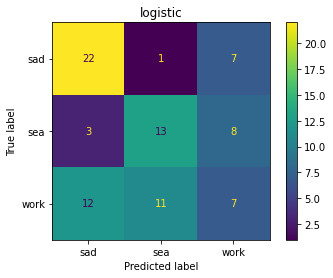

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         sad       0.59      0.73      0.66        30
         sea       0.52      0.54      0.53        24
        work       0.32      0.23      0.27        30

    accuracy                           0.50        84
   macro avg       0.48      0.50      0.49        84
weighted avg       0.47      0.50      0.48        84



 RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.5476190476190477

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['sad', 'sea', 'work'], dtype='<U4')

Text(0.5, 1.0, 'Random forest')

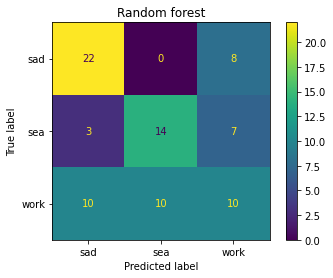

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         sad       0.63      0.73      0.68        30
         sea       0.58      0.58      0.58        24
        work       0.40      0.33      0.36        30

    accuracy                           0.55        84
   macro avg       0.54      0.55      0.54        84
weighted avg       0.53      0.55      0.54        84



 xgboost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred )
print(accuracy)

0.5119047619047619


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['sad', 'sea', 'work'], dtype='<U4')

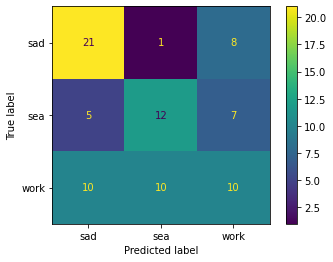

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         sad       0.58      0.70      0.64        30
         sea       0.52      0.50      0.51        24
        work       0.40      0.33      0.36        30

    accuracy                           0.51        84
   macro avg       0.50      0.51      0.50        84
weighted avg       0.50      0.51      0.50        84



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.44047619047619047


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['sad', 'sea', 'work'], dtype='<U4')

Text(0.5, 1.0, 'DecisionTreeClassifier')

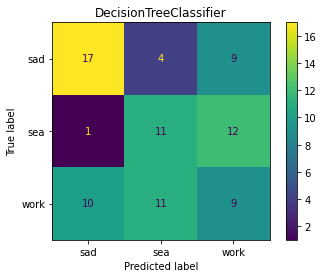

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         sad       0.61      0.57      0.59        30
         sea       0.42      0.46      0.44        24
        work       0.30      0.30      0.30        30

    accuracy                           0.44        84
   macro avg       0.44      0.44      0.44        84
weighted avg       0.44      0.44      0.44        84



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.481 (0.091)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['sad', 'sea', 'work'], dtype='<U4')

Text(0.5, 1.0, 'AdaBoostClassifier')

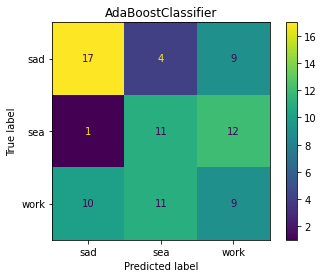

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         sad       0.61      0.57      0.59        30
         sea       0.42      0.46      0.44        24
        work       0.30      0.30      0.30        30

    accuracy                           0.44        84
   macro avg       0.44      0.44      0.44        84
weighted avg       0.44      0.44      0.44        84



#**discourage,sad,sea 54%-58%**#





In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'work']
df = df[df.label != 'cry']
df = df[df.label != 'chillhop']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']

 scaled data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

 Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(196, 10)

In [ ]:
X_test.shape

(84, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
74,0.683,0.410,6,-9.448,0,0.0261,0.000008,0.111,0.0772,100.025
341,0.714,0.804,11,-6.271,1,0.0713,0.000001,0.320,0.7310,93.033
65,0.629,0.763,2,-5.470,1,0.0744,0.000000,0.176,0.8090,146.012
736,0.924,0.476,1,-7.624,1,0.0849,0.000034,0.113,0.6930,110.104
347,0.681,0.822,7,-6.090,1,0.0737,0.000022,0.300,0.8590,95.978


In [ ]:
y_train.head()

,label
74,sad
341,sea
65,sad
736,discourage
347,sea


In [ ]:
y_train.value_counts()

label     
discourage    70
sad           70
sea           56
dtype: int64

In [ ]:
y_test.value_counts()

label     
discourage    30
sad           30
sea           24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

 LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.5476190476190477

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['discourage', 'sad', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'logistic')

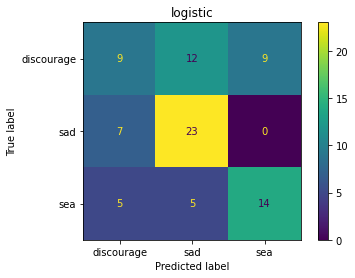

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  discourage       0.43      0.30      0.35        30
         sad       0.57      0.77      0.66        30
         sea       0.61      0.58      0.60        24

    accuracy                           0.55        84
   macro avg       0.54      0.55      0.54        84
weighted avg       0.53      0.55      0.53        84



 RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.5833333333333334

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['discourage', 'sad', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'Random forest')

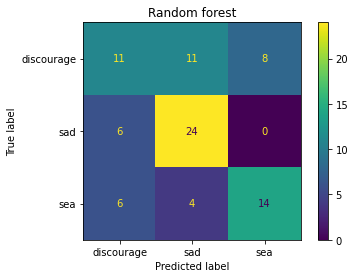

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  discourage       0.48      0.37      0.42        30
         sad       0.62      0.80      0.70        30
         sea       0.64      0.58      0.61        24

    accuracy                           0.58        84
   macro avg       0.58      0.58      0.57        84
weighted avg       0.57      0.58      0.57        84



 xgboost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred )
print(accuracy)

0.5714285714285714


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['discourage', 'sad', 'sea'], dtype='<U10')

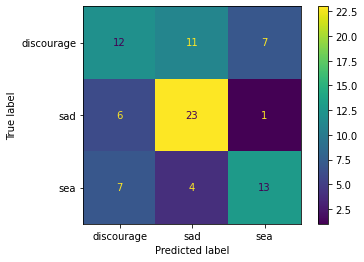

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  discourage       0.48      0.40      0.44        30
         sad       0.61      0.77      0.68        30
         sea       0.62      0.54      0.58        24

    accuracy                           0.57        84
   macro avg       0.57      0.57      0.56        84
weighted avg       0.56      0.57      0.56        84



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.42857142857142855


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['discourage', 'sad', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'DecisionTreeClassifier')

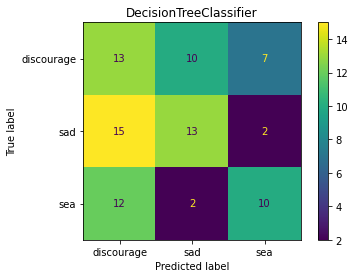

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  discourage       0.33      0.43      0.37        30
         sad       0.52      0.43      0.47        30
         sea       0.53      0.42      0.47        24

    accuracy                           0.43        84
   macro avg       0.46      0.43      0.44        84
weighted avg       0.45      0.43      0.43        84



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.507 (0.085)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['discourage', 'sad', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'AdaBoostClassifier')

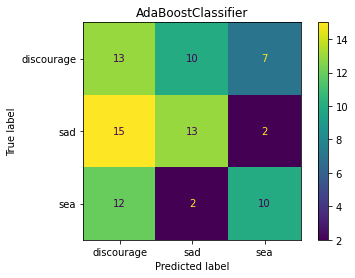

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  discourage       0.33      0.43      0.37        30
         sad       0.52      0.43      0.47        30
         sea       0.53      0.42      0.47        24

    accuracy                           0.43        84
   macro avg       0.46      0.43      0.44        84
weighted avg       0.45      0.43      0.43        84



#**cry,sad,sea 44%-52%**



In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'discourage']
df = df[df.label != 'work']
df = df[df.label != 'chillhop']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']


 scaled data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

 Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(196, 10)

In [ ]:
X_test.shape

(84, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
74,0.683,0.410,6,-9.448,0,0.0261,0.000008,0.111,0.0772,100.025
341,0.714,0.804,11,-6.271,1,0.0713,0.000001,0.320,0.7310,93.033
65,0.629,0.763,2,-5.470,1,0.0744,0.000000,0.176,0.8090,146.012
896,0.462,0.564,5,-5.748,1,0.0428,0.000010,0.126,0.4760,128.479
347,0.681,0.822,7,-6.090,1,0.0737,0.000022,0.300,0.8590,95.978


In [ ]:
y_train.head()

,label
74,sad
341,sea
65,sad
896,cry
347,sea


In [ ]:
y_train.value_counts()

label
cry      70
sad      70
sea      56
dtype: int64

In [ ]:
y_test.value_counts()

label
cry      30
sad      30
sea      24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

 LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.5238095238095238

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['cry', 'sad', 'sea'], dtype='<U3')

Text(0.5, 1.0, 'logistic')

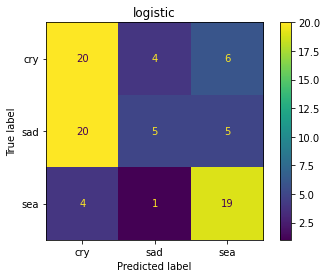

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         cry       0.45      0.67      0.54        30
         sad       0.50      0.17      0.25        30
         sea       0.63      0.79      0.70        24

    accuracy                           0.52        84
   macro avg       0.53      0.54      0.50        84
weighted avg       0.52      0.52      0.48        84



RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.47619047619047616

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['cry', 'sad', 'sea'], dtype='<U3')

Text(0.5, 1.0, 'Random forest')

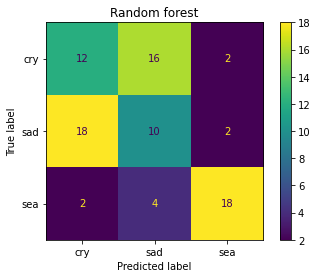

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         cry       0.38      0.40      0.39        30
         sad       0.33      0.33      0.33        30
         sea       0.82      0.75      0.78        24

    accuracy                           0.48        84
   macro avg       0.51      0.49      0.50        84
weighted avg       0.49      0.48      0.48        84



 xgboost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred )
print(accuracy)

0.5


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['cry', 'sad', 'sea'], dtype='<U3')

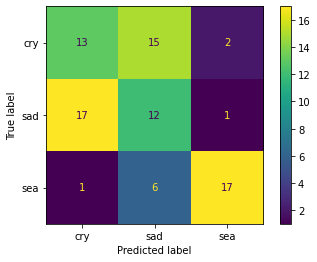

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         cry       0.42      0.43      0.43        30
         sad       0.36      0.40      0.38        30
         sea       0.85      0.71      0.77        24

    accuracy                           0.50        84
   macro avg       0.54      0.51      0.53        84
weighted avg       0.52      0.50      0.51        84



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.40476190476190477


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['cry', 'sad', 'sea'], dtype='<U3')

Text(0.5, 1.0, 'DecisionTreeClassifier')

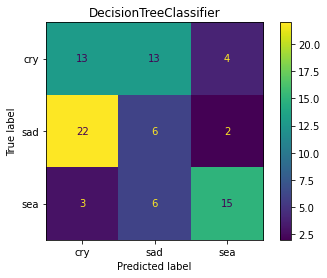

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         cry       0.34      0.43      0.38        30
         sad       0.24      0.20      0.22        30
         sea       0.71      0.62      0.67        24

    accuracy                           0.40        84
   macro avg       0.43      0.42      0.42        84
weighted avg       0.41      0.40      0.40        84



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.473 (0.076)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['cry', 'sad', 'sea'], dtype='<U3')

Text(0.5, 1.0, 'AdaBoostClassifier')

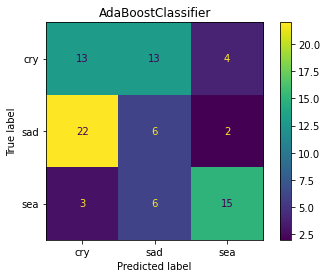

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         cry       0.34      0.43      0.38        30
         sad       0.24      0.20      0.22        30
         sea       0.71      0.62      0.67        24

    accuracy                           0.40        84
   macro avg       0.43      0.42      0.42        84
weighted avg       0.41      0.40      0.40        84



#**chillhop,work,sea 53%-64%**



In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'discourage']
df = df[df.label != 'cry']
df = df[df.label != 'sad']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']


 scaled data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

 Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(196, 10)

In [ ]:
X_test.shape

(84, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
467,0.638,0.193,9,-12.366,1,0.0357,0.000000,0.3160,0.550,140.118
483,0.822,0.678,0,-3.494,1,0.0341,0.000003,0.0975,0.535,83.497
519,0.505,0.596,4,-7.027,1,0.0410,0.000000,0.2610,0.335,167.517
256,0.727,0.564,0,-8.480,1,0.0801,0.000000,0.2840,0.271,110.064
534,0.832,0.632,1,-6.982,1,0.0423,0.000000,0.1090,0.830,102.992


In [ ]:
y_train.head()

,label
467,work
483,work
519,work
256,chillhop
534,work


In [ ]:
y_train.value_counts()

label   
chillhop    70
work        70
sea         56
dtype: int64

In [ ]:
y_test.value_counts()

label   
chillhop    30
work        30
sea         24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

 LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.5357142857142857

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sea', 'work'], dtype='<U8')

Text(0.5, 1.0, 'logistic')

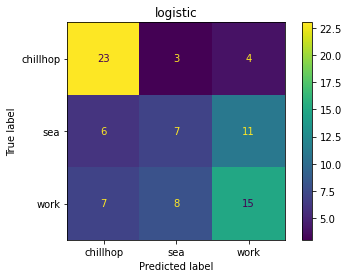

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.64      0.77      0.70        30
         sea       0.39      0.29      0.33        24
        work       0.50      0.50      0.50        30

    accuracy                           0.54        84
   macro avg       0.51      0.52      0.51        84
weighted avg       0.52      0.54      0.52        84



RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.6547619047619048

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sea', 'work'], dtype='<U8')

Text(0.5, 1.0, 'Random forest')

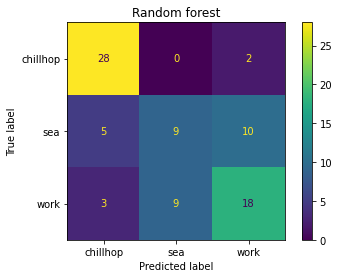

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.78      0.93      0.85        30
         sea       0.50      0.38      0.43        24
        work       0.60      0.60      0.60        30

    accuracy                           0.65        84
   macro avg       0.63      0.64      0.63        84
weighted avg       0.63      0.65      0.64        84



 xgboost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred )
print(accuracy)

0.5714285714285714


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sea', 'work'], dtype='<U8')

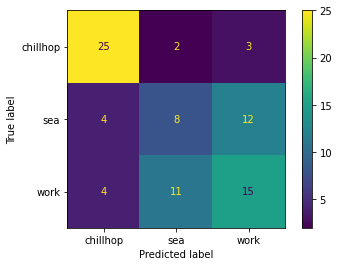

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.76      0.83      0.79        30
         sea       0.38      0.33      0.36        24
        work       0.50      0.50      0.50        30

    accuracy                           0.57        84
   macro avg       0.55      0.56      0.55        84
weighted avg       0.56      0.57      0.56        84



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4642857142857143


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sea', 'work'], dtype='<U8')

Text(0.5, 1.0, 'DecisionTreeClassifier')

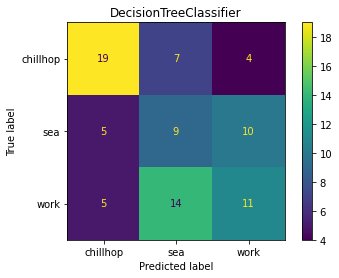

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.66      0.63      0.64        30
         sea       0.30      0.38      0.33        24
        work       0.44      0.37      0.40        30

    accuracy                           0.46        84
   macro avg       0.47      0.46      0.46        84
weighted avg       0.48      0.46      0.47        84



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.623 (0.087)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sea', 'work'], dtype='<U8')

Text(0.5, 1.0, 'AdaBoostClassifier')

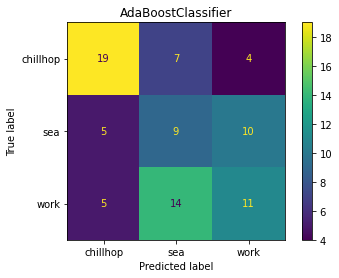

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.66      0.63      0.64        30
         sea       0.30      0.38      0.33        24
        work       0.44      0.37      0.40        30

    accuracy                           0.46        84
   macro avg       0.47      0.46      0.46        84
weighted avg       0.48      0.46      0.47        84



#**chillhop,discourage,sea 57%-68%**



In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'cry']
df = df[df.label != 'work']
df = df[df.label != 'sad']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']


 scaled data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

 Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(196, 10)

In [ ]:
X_test.shape

(84, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
734,0.674,0.400,6,-8.487,0,0.0377,0.000010,0.2190,0.740,169.760
341,0.714,0.804,11,-6.271,1,0.0713,0.000001,0.3200,0.731,93.033
725,0.532,0.422,7,-9.456,1,0.0837,0.000000,0.0762,0.581,182.063
256,0.727,0.564,0,-8.480,1,0.0801,0.000000,0.2840,0.271,110.064
347,0.681,0.822,7,-6.090,1,0.0737,0.000022,0.3000,0.859,95.978


In [ ]:
y_train.head()

,label
734,discourage
341,sea
725,discourage
256,chillhop
347,sea


In [ ]:
y_train.value_counts()

label     
chillhop      70
discourage    70
sea           56
dtype: int64

In [ ]:
y_test.value_counts()

label     
chillhop      30
discourage    30
sea           24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

 LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.5714285714285714

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'logistic')

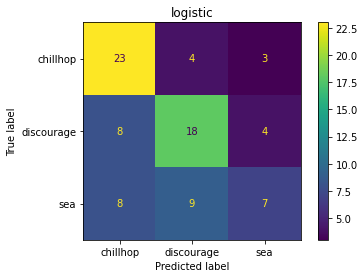

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.59      0.77      0.67        30
  discourage       0.58      0.60      0.59        30
         sea       0.50      0.29      0.37        24

    accuracy                           0.57        84
   macro avg       0.56      0.55      0.54        84
weighted avg       0.56      0.57      0.55        84



RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.6666666666666666

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'Random forest')

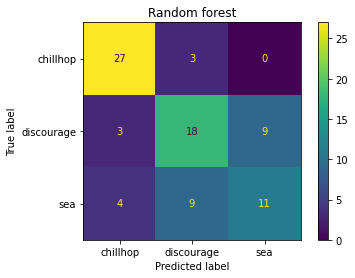

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.79      0.90      0.84        30
  discourage       0.60      0.60      0.60        30
         sea       0.55      0.46      0.50        24

    accuracy                           0.67        84
   macro avg       0.65      0.65      0.65        84
weighted avg       0.66      0.67      0.66        84



 xgboost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred )
print(accuracy)

0.6666666666666666


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sea'], dtype='<U10')

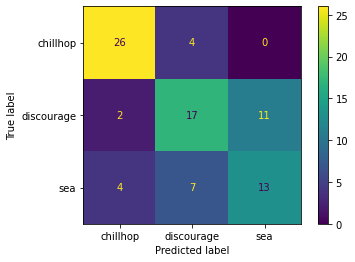

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.81      0.87      0.84        30
  discourage       0.61      0.57      0.59        30
         sea       0.54      0.54      0.54        24

    accuracy                           0.67        84
   macro avg       0.65      0.66      0.66        84
weighted avg       0.66      0.67      0.66        84



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4523809523809524


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'DecisionTreeClassifier')

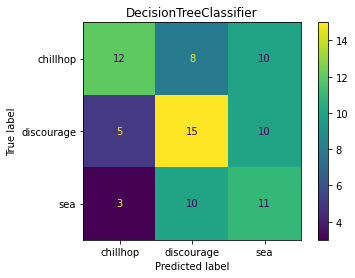

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.60      0.40      0.48        30
  discourage       0.45      0.50      0.48        30
         sea       0.35      0.46      0.40        24

    accuracy                           0.45        84
   macro avg       0.47      0.45      0.45        84
weighted avg       0.48      0.45      0.46        84



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.555 (0.098)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'AdaBoostClassifier')

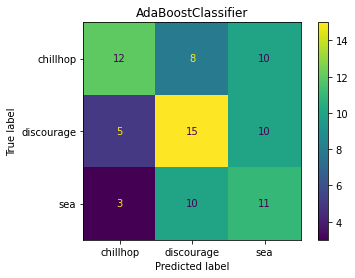

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.60      0.40      0.48        30
  discourage       0.45      0.50      0.48        30
         sea       0.35      0.46      0.40        24

    accuracy                           0.45        84
   macro avg       0.47      0.45      0.45        84
weighted avg       0.48      0.45      0.46        84



#**chillhop,cry,sea 72%-76%**



In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'discourage']
df = df[df.label != 'work']
df = df[df.label != 'sad']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']


 scaled data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

 Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(196, 10)

In [ ]:
X_test.shape

(84, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
894,0.386,0.825,8,-5.790,1,0.0698,0.000000,0.169,0.202,173.947
341,0.714,0.804,11,-6.271,1,0.0713,0.000001,0.320,0.731,93.033
885,0.574,0.721,4,-4.986,1,0.0369,0.000000,0.127,0.362,148.072
256,0.727,0.564,0,-8.480,1,0.0801,0.000000,0.284,0.271,110.064
347,0.681,0.822,7,-6.090,1,0.0737,0.000022,0.300,0.859,95.978


In [ ]:
y_train.head()

,label
894,cry
341,sea
885,cry
256,chillhop
347,sea


In [ ]:
y_train.value_counts()

label   
chillhop    70
cry         70
sea         56
dtype: int64

In [ ]:
y_test.value_counts()

label   
chillhop    30
cry         30
sea         24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

 LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.7380952380952381

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'logistic')

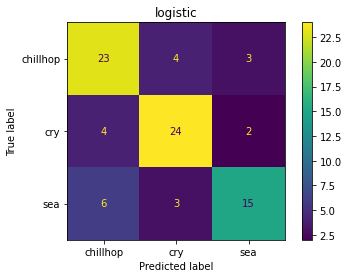

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.70      0.77      0.73        30
         cry       0.77      0.80      0.79        30
         sea       0.75      0.62      0.68        24

    accuracy                           0.74        84
   macro avg       0.74      0.73      0.73        84
weighted avg       0.74      0.74      0.74        84



RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.7857142857142857

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'Random forest')

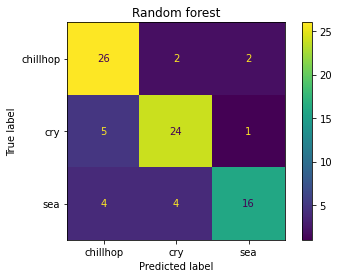

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.74      0.87      0.80        30
         cry       0.80      0.80      0.80        30
         sea       0.84      0.67      0.74        24

    accuracy                           0.79        84
   macro avg       0.79      0.78      0.78        84
weighted avg       0.79      0.79      0.78        84



 xgboost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred )
print(accuracy)

0.7261904761904762


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sea'], dtype='<U8')

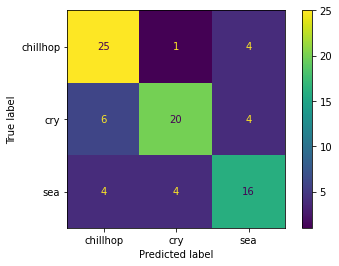

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.71      0.83      0.77        30
         cry       0.80      0.67      0.73        30
         sea       0.67      0.67      0.67        24

    accuracy                           0.73        84
   macro avg       0.73      0.72      0.72        84
weighted avg       0.73      0.73      0.72        84



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7857142857142857


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'DecisionTreeClassifier')

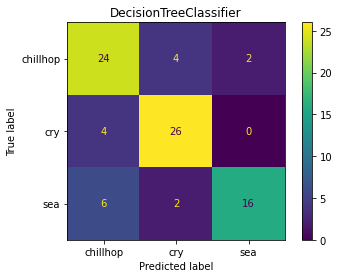

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.71      0.80      0.75        30
         cry       0.81      0.87      0.84        30
         sea       0.89      0.67      0.76        24

    accuracy                           0.79        84
   macro avg       0.80      0.78      0.78        84
weighted avg       0.80      0.79      0.79        84



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.687 (0.088)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'AdaBoostClassifier')

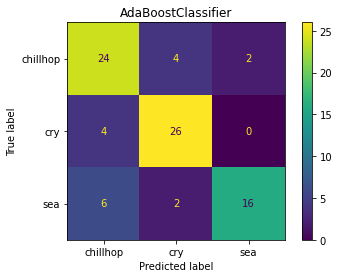

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.71      0.80      0.75        30
         cry       0.81      0.87      0.84        30
         sea       0.89      0.67      0.76        24

    accuracy                           0.79        84
   macro avg       0.80      0.78      0.78        84
weighted avg       0.80      0.79      0.79        84



#**chillhop,sad,work 60%-66%**



In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'cry']
df = df[df.label != 'sea']
df = df[df.label != 'discourage']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']


 scaled data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

 Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(210, 10)

In [ ]:
X_test.shape

(90, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
20,0.536,0.421,11,-11.907,0,0.0344,0.000112,0.1020,0.534,138.013
477,0.676,0.599,11,-7.617,0,0.0246,0.000000,0.0504,0.629,103.975
207,0.704,0.552,9,-9.369,1,0.0367,0.000003,0.1430,0.583,150.097
60,0.573,0.941,6,-3.827,1,0.0641,0.000001,0.0941,0.542,125.982
534,0.832,0.632,1,-6.982,1,0.0423,0.000000,0.1090,0.830,102.992


In [ ]:
y_train.head()

,label
20,sad
477,work
207,chillhop
60,sad
534,work


In [ ]:
y_train.value_counts()

label   
chillhop    70
sad         70
work        70
dtype: int64

In [ ]:
y_test.value_counts()

label   
chillhop    30
sad         30
work        30
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

 LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.6111111111111112

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'work'], dtype='<U8')

Text(0.5, 1.0, 'logistic')

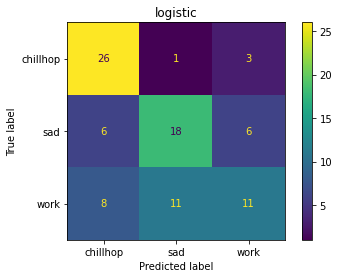

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.65      0.87      0.74        30
         sad       0.60      0.60      0.60        30
        work       0.55      0.37      0.44        30

    accuracy                           0.61        90
   macro avg       0.60      0.61      0.59        90
weighted avg       0.60      0.61      0.59        90



RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.6666666666666666

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'work'], dtype='<U8')

Text(0.5, 1.0, 'Random forest')

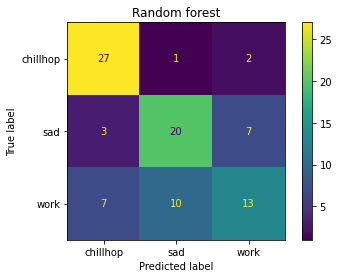

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.73      0.90      0.81        30
         sad       0.65      0.67      0.66        30
        work       0.59      0.43      0.50        30

    accuracy                           0.67        90
   macro avg       0.66      0.67      0.65        90
weighted avg       0.66      0.67      0.65        90



 xgboost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred )
print(accuracy)

0.6666666666666666


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'work'], dtype='<U8')

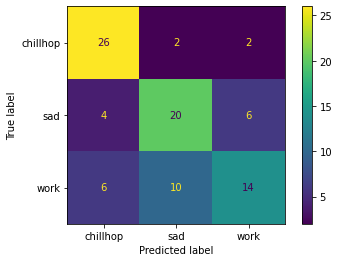

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.72      0.87      0.79        30
         sad       0.62      0.67      0.65        30
        work       0.64      0.47      0.54        30

    accuracy                           0.67        90
   macro avg       0.66      0.67      0.66        90
weighted avg       0.66      0.67      0.66        90



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6111111111111112


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'work'], dtype='<U8')

Text(0.5, 1.0, 'DecisionTreeClassifier')

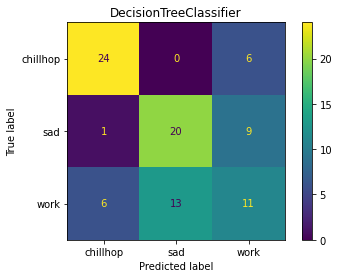

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.77      0.80      0.79        30
         sad       0.61      0.67      0.63        30
        work       0.42      0.37      0.39        30

    accuracy                           0.61        90
   macro avg       0.60      0.61      0.60        90
weighted avg       0.60      0.61      0.60        90



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.612 (0.067)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'work'], dtype='<U8')

Text(0.5, 1.0, 'AdaBoostClassifier')

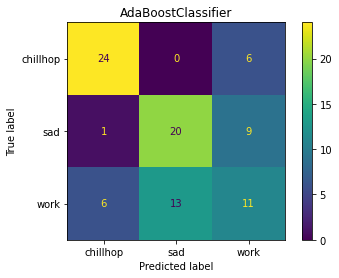

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.77      0.80      0.79        30
         sad       0.61      0.67      0.63        30
        work       0.42      0.37      0.39        30

    accuracy                           0.61        90
   macro avg       0.60      0.61      0.60        90
weighted avg       0.60      0.61      0.60        90



#**chillhop,sad,discourage 60%-64%**



In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'cry']
df = df[df.label != 'sea']
df = df[df.label != 'work']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']


 scaled data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

 Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(210, 10)

In [ ]:
X_test.shape

(90, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
680,0.678,0.569,11,-9.101,1,0.0319,0.000000,0.2500,0.4000,94.995
17,0.753,0.649,5,-5.494,1,0.0742,0.000000,0.0778,0.5500,98.952
207,0.704,0.552,9,-9.369,1,0.0367,0.000003,0.1430,0.5830,150.097
720,0.615,0.576,4,-5.220,1,0.0411,0.000000,0.1830,0.5910,131.866
74,0.683,0.410,6,-9.448,0,0.0261,0.000008,0.1110,0.0772,100.025


In [ ]:
y_train.head()

,label
680,discourage
17,sad
207,chillhop
720,discourage
74,sad


In [ ]:
y_train.value_counts()

label     
chillhop      70
discourage    70
sad           70
dtype: int64

In [ ]:
y_test.value_counts()

label     
chillhop      30
discourage    30
sad           30
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

 LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.6

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sad'], dtype='<U10')

Text(0.5, 1.0, 'logistic')

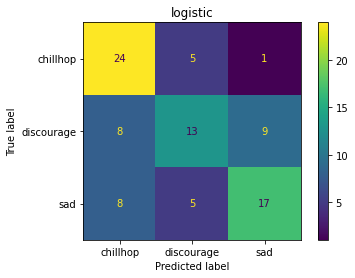

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.60      0.80      0.69        30
  discourage       0.57      0.43      0.49        30
         sad       0.63      0.57      0.60        30

    accuracy                           0.60        90
   macro avg       0.60      0.60      0.59        90
weighted avg       0.60      0.60      0.59        90



RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.6666666666666666

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sad'], dtype='<U10')

Text(0.5, 1.0, 'Random forest')

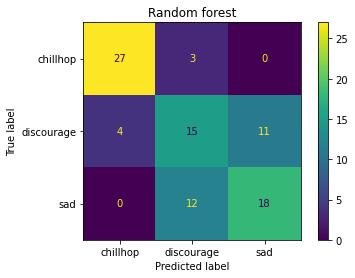

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.87      0.90      0.89        30
  discourage       0.50      0.50      0.50        30
         sad       0.62      0.60      0.61        30

    accuracy                           0.67        90
   macro avg       0.66      0.67      0.67        90
weighted avg       0.66      0.67      0.67        90



 xgboost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred )
print(accuracy)

0.6333333333333333


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sad'], dtype='<U10')

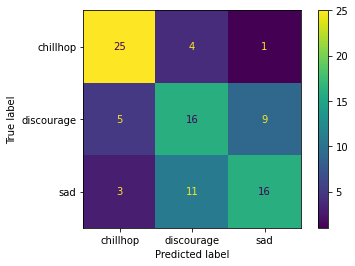

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.76      0.83      0.79        30
  discourage       0.52      0.53      0.52        30
         sad       0.62      0.53      0.57        30

    accuracy                           0.63        90
   macro avg       0.63      0.63      0.63        90
weighted avg       0.63      0.63      0.63        90



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5666666666666667


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sad'], dtype='<U10')

Text(0.5, 1.0, 'DecisionTreeClassifier')

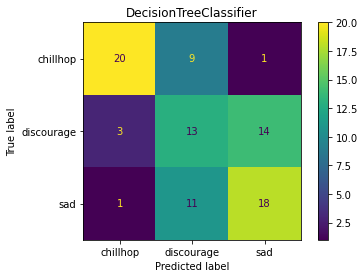

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.83      0.67      0.74        30
  discourage       0.39      0.43      0.41        30
         sad       0.55      0.60      0.57        30

    accuracy                           0.57        90
   macro avg       0.59      0.57      0.57        90
weighted avg       0.59      0.57      0.57        90



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.613 (0.083)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sad'], dtype='<U10')

Text(0.5, 1.0, 'AdaBoostClassifier')

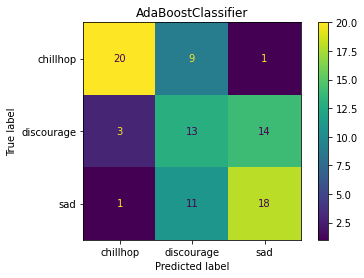

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.83      0.67      0.74        30
  discourage       0.39      0.43      0.41        30
         sad       0.55      0.60      0.57        30

    accuracy                           0.57        90
   macro avg       0.59      0.57      0.57        90
weighted avg       0.59      0.57      0.57        90



#**chillhop,sad,cry 51%-57%**



In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'discourage']
df = df[df.label != 'sea']
df = df[df.label != 'work']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']


 scaled data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

 Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(210, 10)

In [ ]:
X_test.shape

(90, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
840,0.440,0.278,6,-10.348,1,0.0275,0.000000,0.1290,0.1590,75.635
17,0.753,0.649,5,-5.494,1,0.0742,0.000000,0.0778,0.5500,98.952
207,0.704,0.552,9,-9.369,1,0.0367,0.000003,0.1430,0.5830,150.097
880,0.710,0.575,10,-10.046,0,0.0531,0.000396,0.0893,0.4170,84.976
74,0.683,0.410,6,-9.448,0,0.0261,0.000008,0.1110,0.0772,100.025


In [ ]:
y_train.head()

,label
840,cry
17,sad
207,chillhop
880,cry
74,sad


In [ ]:
y_train.value_counts()

label   
chillhop    70
cry         70
sad         70
dtype: int64

In [ ]:
y_test.value_counts()

label   
chillhop    30
cry         30
sad         30
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

 LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.5333333333333333

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad'], dtype='<U8')

Text(0.5, 1.0, 'logistic')

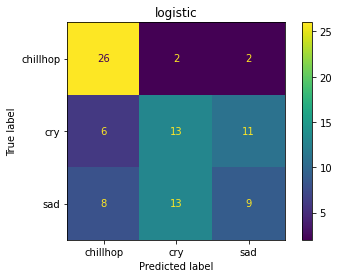

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.65      0.87      0.74        30
         cry       0.46      0.43      0.45        30
         sad       0.41      0.30      0.35        30

    accuracy                           0.53        90
   macro avg       0.51      0.53      0.51        90
weighted avg       0.51      0.53      0.51        90



RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.5444444444444444

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad'], dtype='<U8')

Text(0.5, 1.0, 'Random forest')

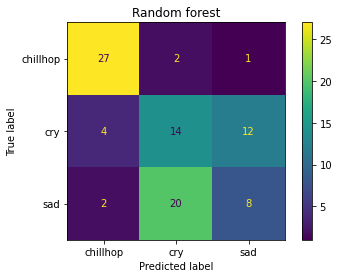

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.82      0.90      0.86        30
         cry       0.39      0.47      0.42        30
         sad       0.38      0.27      0.31        30

    accuracy                           0.54        90
   macro avg       0.53      0.54      0.53        90
weighted avg       0.53      0.54      0.53        90



 xgboost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred )
print(accuracy)

0.5111111111111111


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad'], dtype='<U8')

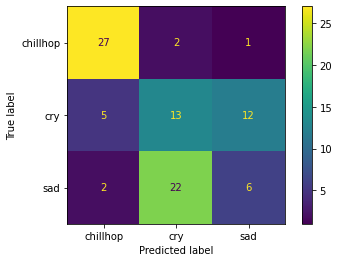

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.79      0.90      0.84        30
         cry       0.35      0.43      0.39        30
         sad       0.32      0.20      0.24        30

    accuracy                           0.51        90
   macro avg       0.49      0.51      0.49        90
weighted avg       0.49      0.51      0.49        90



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5666666666666667


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad'], dtype='<U8')

Text(0.5, 1.0, 'DecisionTreeClassifier')

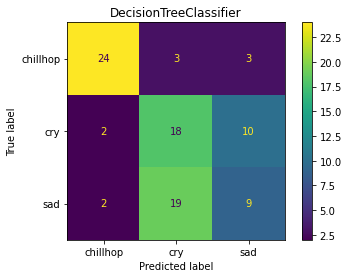

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.86      0.80      0.83        30
         cry       0.45      0.60      0.51        30
         sad       0.41      0.30      0.35        30

    accuracy                           0.57        90
   macro avg       0.57      0.57      0.56        90
weighted avg       0.57      0.57      0.56        90



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.543 (0.064)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad'], dtype='<U8')

Text(0.5, 1.0, 'AdaBoostClassifier')

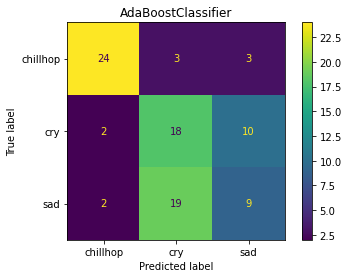

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.86      0.80      0.83        30
         cry       0.45      0.60      0.51        30
         sad       0.41      0.30      0.35        30

    accuracy                           0.57        90
   macro avg       0.57      0.57      0.56        90
weighted avg       0.57      0.57      0.56        90



#**chillhop,sad,sea,work 50%-60%**



In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'discourage']
df = df[df.label != 'cry']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']


 scaled data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

 Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(266, 10)

In [ ]:
X_test.shape

(114, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
510,0.557,0.295,5,-12.706,1,0.0355,0.002010,0.1110,0.133,76.061
184,0.898,0.478,0,-8.890,0,0.0379,0.000158,0.1110,0.420,110.986
461,0.538,0.669,8,-5.140,1,0.0390,0.000000,0.0755,0.498,90.940
542,0.626,0.870,10,-3.826,1,0.0277,0.000028,0.0961,0.838,97.460
227,0.803,0.491,0,-9.950,0,0.0712,0.000000,0.1450,0.490,123.911


In [ ]:
y_train.head()

,label
510,work
184,chillhop
461,work
542,work
227,chillhop


In [ ]:
y_train.value_counts()

label   
chillhop    70
sad         70
work        70
sea         56
dtype: int64

In [ ]:
y_test.value_counts()

label   
chillhop    30
sad         30
work        30
sea         24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

 LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.5087719298245614

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea', 'work'], dtype='<U8')

Text(0.5, 1.0, 'logistic')

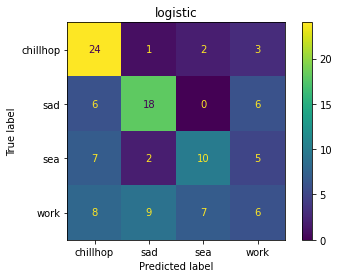

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.53      0.80      0.64        30
         sad       0.60      0.60      0.60        30
         sea       0.53      0.42      0.47        24
        work       0.30      0.20      0.24        30

    accuracy                           0.51       114
   macro avg       0.49      0.50      0.49       114
weighted avg       0.49      0.51      0.49       114



RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.6140350877192983

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea', 'work'], dtype='<U8')

Text(0.5, 1.0, 'Random forest')

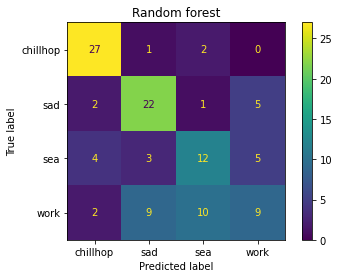

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.77      0.90      0.83        30
         sad       0.63      0.73      0.68        30
         sea       0.48      0.50      0.49        24
        work       0.47      0.30      0.37        30

    accuracy                           0.61       114
   macro avg       0.59      0.61      0.59       114
weighted avg       0.59      0.61      0.60       114



 xgboost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred )
print(accuracy)

0.5701754385964912


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea', 'work'], dtype='<U8')

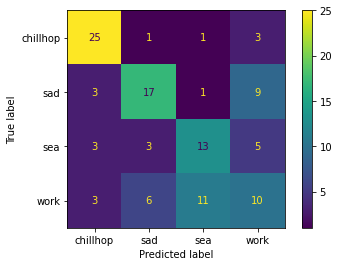

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.74      0.83      0.78        30
         sad       0.63      0.57      0.60        30
         sea       0.50      0.54      0.52        24
        work       0.37      0.33      0.35        30

    accuracy                           0.57       114
   macro avg       0.56      0.57      0.56       114
weighted avg       0.56      0.57      0.56       114



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.39473684210526316


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea', 'work'], dtype='<U8')

Text(0.5, 1.0, 'DecisionTreeClassifier')

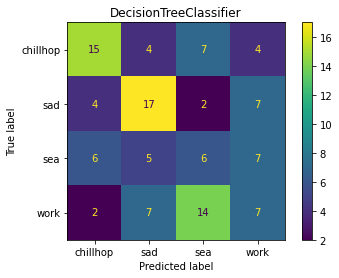

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.56      0.50      0.53        30
         sad       0.52      0.57      0.54        30
         sea       0.21      0.25      0.23        24
        work       0.28      0.23      0.25        30

    accuracy                           0.39       114
   macro avg       0.39      0.39      0.39       114
weighted avg       0.40      0.39      0.40       114



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.503 (0.082)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea', 'work'], dtype='<U8')

Text(0.5, 1.0, 'AdaBoostClassifier')

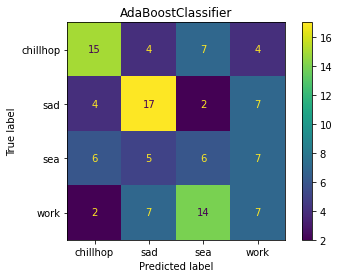

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.56      0.50      0.53        30
         sad       0.52      0.57      0.54        30
         sea       0.21      0.25      0.23        24
        work       0.28      0.23      0.25        30

    accuracy                           0.39       114
   macro avg       0.39      0.39      0.39       114
weighted avg       0.40      0.39      0.40       114



#**chillhop,sad,sea,discourage 52%-56%**



In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'work']
df = df[df.label != 'cry']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']


 scaled data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

 Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(266, 10)

In [ ]:
X_test.shape

(114, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
228,0.744,0.348,2,-15.550,1,0.0338,0.000008,0.1170,0.7530,86.992
331,0.877,0.397,0,-8.148,1,0.1160,0.000000,0.1720,0.4940,94.032
320,0.713,0.497,11,-7.418,0,0.0310,0.000025,0.0498,0.8920,91.000
74,0.683,0.410,6,-9.448,0,0.0261,0.000008,0.1110,0.0772,100.025
746,0.711,0.499,1,-9.584,1,0.0404,0.003570,0.1700,0.2440,119.894


In [ ]:
y_train.head()

,label
228,chillhop
331,sea
320,sea
74,sad
746,discourage


In [ ]:
y_train.value_counts()

label     
chillhop      70
discourage    70
sad           70
sea           56
dtype: int64

In [ ]:
y_test.value_counts()

label     
chillhop      30
discourage    30
sad           30
sea           24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

 LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.5263157894736842

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sad', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'logistic')

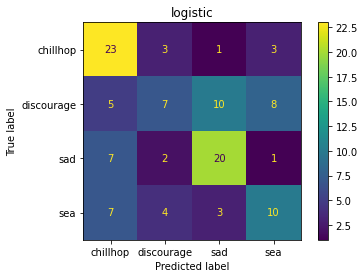

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.55      0.77      0.64        30
  discourage       0.44      0.23      0.30        30
         sad       0.59      0.67      0.62        30
         sea       0.45      0.42      0.43        24

    accuracy                           0.53       114
   macro avg       0.51      0.52      0.50       114
weighted avg       0.51      0.53      0.50       114



RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.5964912280701754

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sad', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'Random forest')

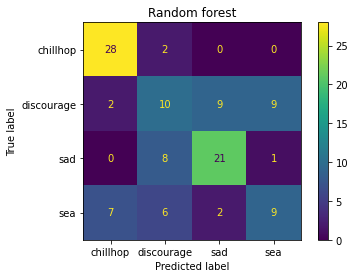

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.76      0.93      0.84        30
  discourage       0.38      0.33      0.36        30
         sad       0.66      0.70      0.68        30
         sea       0.47      0.38      0.42        24

    accuracy                           0.60       114
   macro avg       0.57      0.59      0.57       114
weighted avg       0.57      0.60      0.58       114



 xgboost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred )
print(accuracy)

0.5526315789473685


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sad', 'sea'], dtype='<U10')

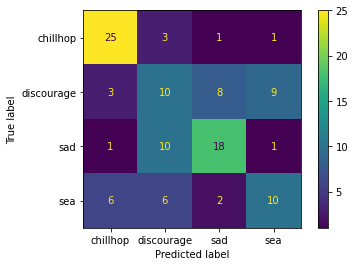

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.71      0.83      0.77        30
  discourage       0.34      0.33      0.34        30
         sad       0.62      0.60      0.61        30
         sea       0.48      0.42      0.44        24

    accuracy                           0.55       114
   macro avg       0.54      0.55      0.54       114
weighted avg       0.54      0.55      0.55       114



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4649122807017544


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sad', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'DecisionTreeClassifier')

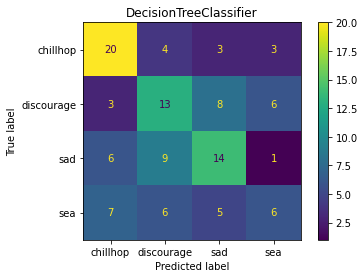

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.56      0.67      0.61        30
  discourage       0.41      0.43      0.42        30
         sad       0.47      0.47      0.47        30
         sea       0.38      0.25      0.30        24

    accuracy                           0.46       114
   macro avg       0.45      0.45      0.45       114
weighted avg       0.45      0.46      0.46       114



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.507 (0.071)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sad', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'AdaBoostClassifier')

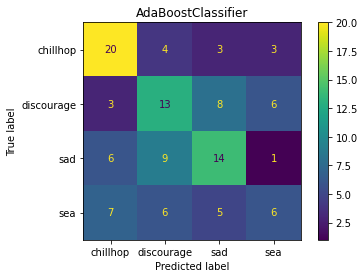

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.56      0.67      0.61        30
  discourage       0.41      0.43      0.42        30
         sad       0.47      0.47      0.47        30
         sea       0.38      0.25      0.30        24

    accuracy                           0.46       114
   macro avg       0.45      0.45      0.45       114
weighted avg       0.45      0.46      0.46       114



#**chillhop,sad,sea,cry 49%-55%**



In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'work']
df = df[df.label != 'discourage']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']


 scaled data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

 Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(266, 10)

In [ ]:
X_test.shape

(114, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
228,0.744,0.348,2,-15.550,1,0.0338,0.000008,0.1170,0.7530,86.992
331,0.877,0.397,0,-8.148,1,0.1160,0.000000,0.1720,0.4940,94.032
320,0.713,0.497,11,-7.418,0,0.0310,0.000025,0.0498,0.8920,91.000
74,0.683,0.410,6,-9.448,0,0.0261,0.000008,0.1110,0.0772,100.025
906,0.630,0.479,11,-7.371,1,0.0298,0.000000,0.0879,0.4600,140.120


In [ ]:
y_train.head()

,label
228,chillhop
331,sea
320,sea
74,sad
906,cry


In [ ]:
y_train.value_counts()

label   
chillhop    70
cry         70
sad         70
sea         56
dtype: int64

In [ ]:
y_test.value_counts()

label   
chillhop    30
cry         30
sad         30
sea         24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

 LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.49122807017543857

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'logistic')

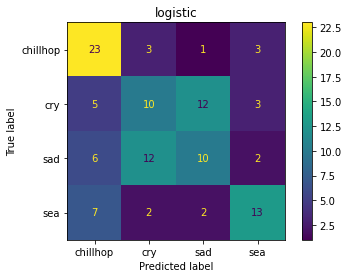

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.56      0.77      0.65        30
         cry       0.37      0.33      0.35        30
         sad       0.40      0.33      0.36        30
         sea       0.62      0.54      0.58        24

    accuracy                           0.49       114
   macro avg       0.49      0.49      0.49       114
weighted avg       0.48      0.49      0.48       114



RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.5614035087719298

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'Random forest')

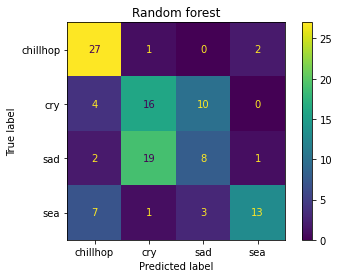

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.68      0.90      0.77        30
         cry       0.43      0.53      0.48        30
         sad       0.38      0.27      0.31        30
         sea       0.81      0.54      0.65        24

    accuracy                           0.56       114
   macro avg       0.58      0.56      0.55       114
weighted avg       0.56      0.56      0.55       114



 xgboost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred )
print(accuracy)

0.5263157894736842


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad', 'sea'], dtype='<U8')

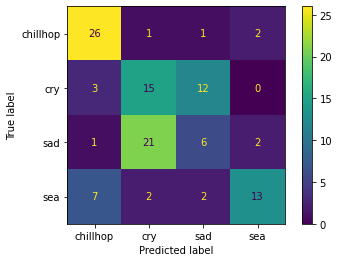

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.70      0.87      0.78        30
         cry       0.38      0.50      0.43        30
         sad       0.29      0.20      0.24        30
         sea       0.76      0.54      0.63        24

    accuracy                           0.53       114
   macro avg       0.53      0.53      0.52       114
weighted avg       0.52      0.53      0.51       114



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.43859649122807015


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'DecisionTreeClassifier')

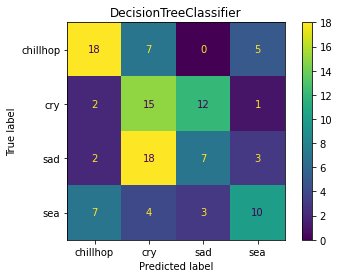

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.62      0.60      0.61        30
         cry       0.34      0.50      0.41        30
         sad       0.32      0.23      0.27        30
         sea       0.53      0.42      0.47        24

    accuracy                           0.44       114
   macro avg       0.45      0.44      0.44       114
weighted avg       0.45      0.44      0.44       114



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.504 (0.085)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'AdaBoostClassifier')

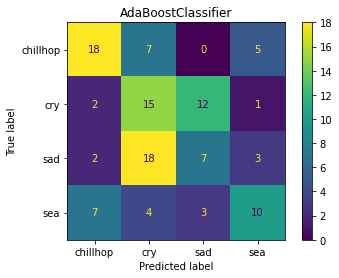

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.62      0.60      0.61        30
         cry       0.34      0.50      0.41        30
         sad       0.32      0.23      0.27        30
         sea       0.53      0.42      0.47        24

    accuracy                           0.44       114
   macro avg       0.45      0.44      0.44       114
weighted avg       0.45      0.44      0.44       114

